Question 1

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [15]:
delivery = pd.read_csv("/content/delivery_time.csv")

In [16]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [17]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [18]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [19]:
delivery.shape

(21, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05899ba5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05899baa40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05899ba200>,
 'medians': [<matplotlib.lines.Line2D at 0x7f05899baf80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f05899bb220>,
 'means': []}

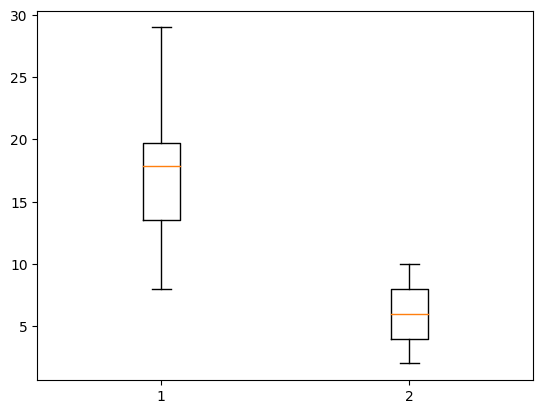

In [20]:
plt.boxplot(delivery)

<ipython-input-21-fd10aded87bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

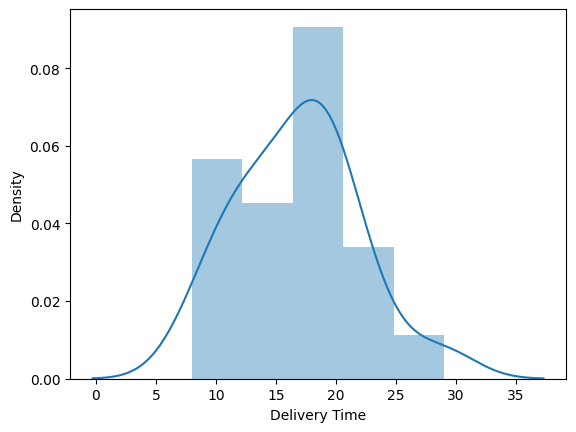

In [21]:
sns.distplot(delivery['Delivery Time'])

<ipython-input-22-bc76fa8d8dd7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

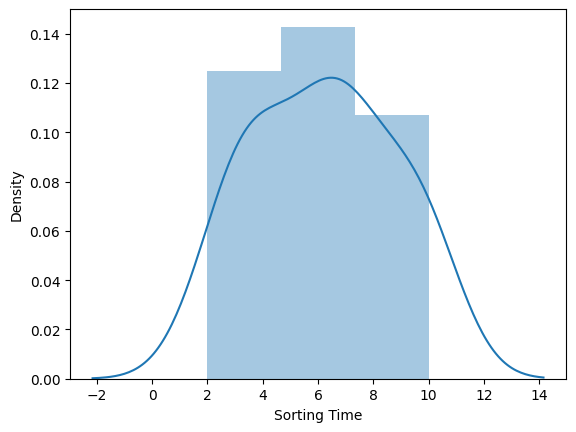

In [22]:
sns.distplot(delivery['Sorting Time'])

Correlation

In [23]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

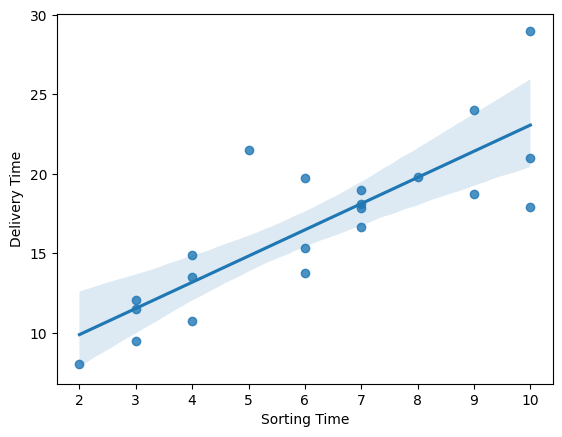

In [24]:
sns.regplot(x=delivery['Sorting Time'],y=delivery['Delivery Time'])

Model building

In [25]:
#model = smf.ols('Delivery Time ~ Sorting Time',data=delivery).fit()

In [26]:
delivery = delivery.rename({'Delivery Time':'deliveryt','Sorting Time':'sortingt'},axis=1)

In [27]:
delivery

,deliveryt,sortingt
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [28]:
model = smf.ols('deliveryt~sortingt',data=delivery).fit()

In [29]:
model.params

Intercept    6.582734
sortingt     1.649020
dtype: float64

In [30]:
model.tvalues ,model.pvalues

(Intercept    3.823349
 sortingt     6.387447
 dtype: float64,
 Intercept    0.001147
 sortingt     0.000004
 dtype: float64)

In [31]:
#finding rsquared value
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model prediction

In [32]:
# predection time for sort time 6
delivery_time = (6.5827) + (1.6490)*(6)
delivery_time

16.4767

In [33]:
#automatic predection
new_data = pd.Series([6])

In [34]:
data_predict =  pd.DataFrame(new_data,columns=['sortingt'])

In [61]:
model.predict(data_predict)

0    16.476853
dtype: float64

Question2

In [36]:
salary = pd.read_csv("/content/Salary_Data.csv")

In [37]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [39]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [40]:
salary.shape

(30, 2)

In [41]:
salary = salary.rename({'YearsExperience':'experience'},axis=1)

In [42]:
salary

,experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f058980a770>,
 'caps': [<matplotlib.lines.Line2D at 0x7f058980acb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f058980a4d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f058980b1f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f058980b490>,
 'means': []}

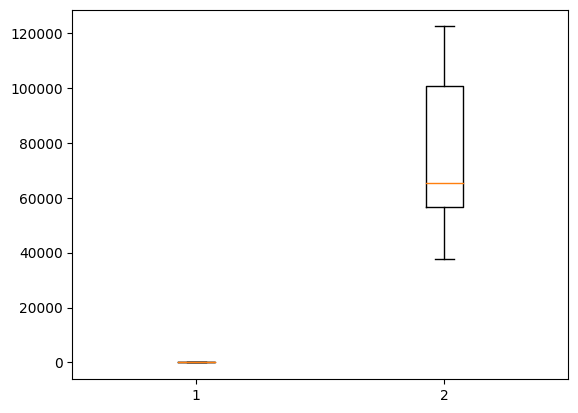

In [43]:
plt.boxplot(salary)

<ipython-input-44-b0a502642afe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['experience'])


<Axes: xlabel='experience', ylabel='Density'>

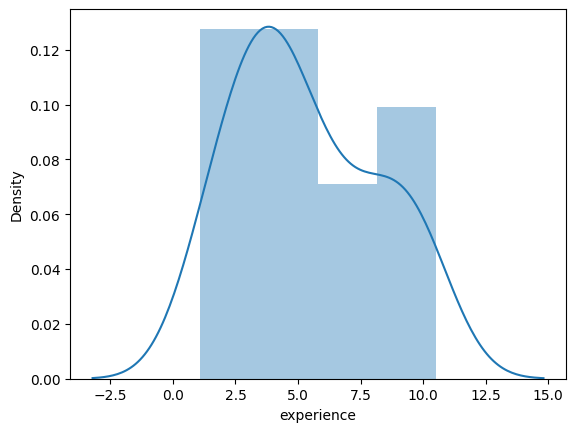

In [44]:
sns.distplot(salary['experience'])

<ipython-input-45-36cdd9539e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

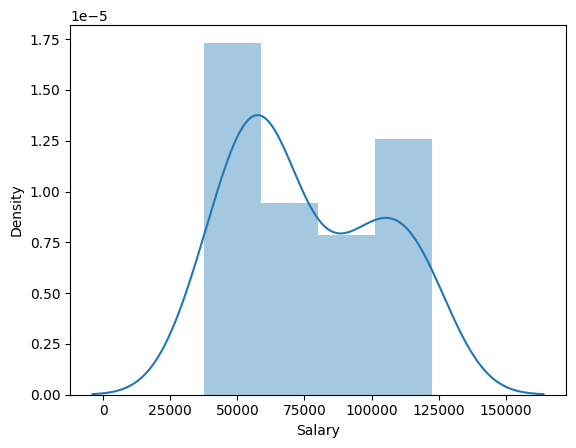

In [45]:
sns.distplot(salary['Salary'])

Correlation

In [46]:
salary.corr()

,experience,Salary
experience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='experience', ylabel='Salary'>

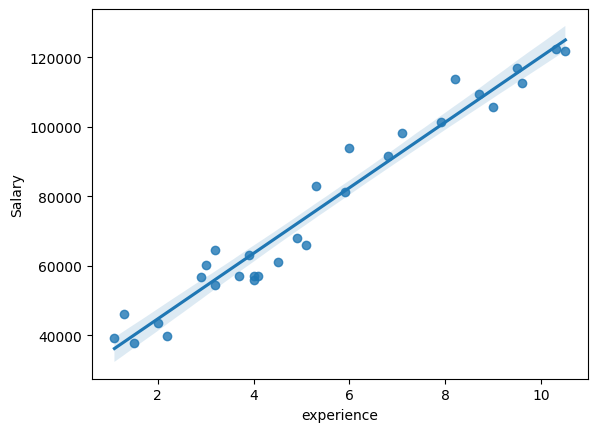

In [47]:
sns.regplot(x=salary['experience'],y=salary['Salary'])

In [48]:
model1 = smf.ols('Salary~experience',data=salary).fit()

In [49]:
model1.params

Intercept     25792.200199
experience     9449.962321
dtype: float64

In [50]:
model1.tvalues,model1.pvalues

(Intercept     11.346940
 experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 experience    1.143068e-20
 dtype: float64)

In [51]:
model1.rsquared,model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Model predection

In [64]:
#manual
# for 4 years experience
salary1 = (25792.2001)+(9449.96232)*(4)
salary1

63592.04938

In [53]:
#automatic
newdata1 = pd.Series([4])

In [56]:
data_predictions = pd.DataFrame(newdata1,columns=['experience'])

In [57]:
data_predictions

,experience
0,4


In [62]:
model1.predict(data_predictions)

0    63592.049484
dtype: float64